In [181]:
import numpy as np 
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [182]:
POPULATION_SIZE = 10
N_GENERATIONS = 20
MUTAION_RATE = 1/8

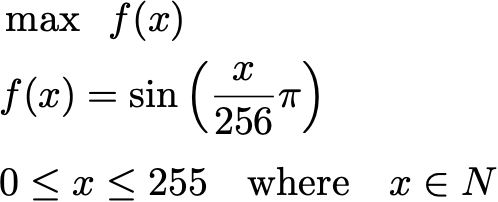

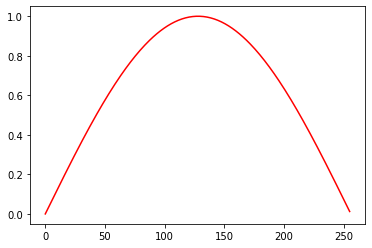

In [183]:
x = np.linspace(0,255,255)
y = np.sin(x / 256 * np.pi)
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [184]:
def to_int(x):
  return (x * [128, 64, 32, 16, 8, 4, 2, 1]).sum()

In [185]:
def evaluate(x):
    y = to_int(x)
    return np.sin(y / 256 * np.pi)

In [186]:
def randpop(n):
  pop = []
  for i in range(n):
    pop.append(np.random.choice([0,1],size=8))
  return pop

In [187]:
def select(population_size,n_parents):
  s = []
  for i in range(population_size):
    if np.random.choice([0,1]) == 1:
      s.append(i)
  l = []
  for i in range(len(s)):
    l.append(np.random.choice(s,size=2))
  return l
def select1(n_matings, n_parents):
    return np.random.randint(0, n_matings, (n_matings, n_parents))

In [188]:
def crossover(a, b):
  offspring = []
  for i in range(len(a)):
    if np.random.choice([0,1]) == 1:
      offspring.append(a[i])
    else :
      offspring.append(b[i])
  return offspring

In [189]:
def mutation(o):
  off = []
  for i in range(len(o)):
    if np.random.rand() > MUTAION_RATE:
      off.append(o[i])
    else :
      if o[i] == 1:
        off.append(0)
      else :
        off.append(1)
  return off

In [190]:
def survival(f, n_survivors):
    return np.argsort(-f)[:n_survivors]

In [191]:
def eliminate_duplicates(X):
    D = cdist(X, X)
    D[np.triu_indices(len(X))] = np.inf
    return np.all(D > 1e-32, axis=1)

In [192]:
np.random.seed(1)

X = randpop(N_GENERATIONS)
Y = np.array([evaluate(x) for x in X])

for k in range(N_GENERATIONS):
   parents = select(POPULATION_SIZE, 2)
   
   #mutate the new genration
   _X = np.array([mutation(crossover(X[a], X[b])) for a, b in parents])
   
   # values of the new generation
   _Y = np.array([evaluate(x) for x in _X])
   
   # merge the population and offsprings
   X, Y = np.row_stack([X, _X]), np.concatenate([Y, _Y])
   
   # perform a duplicate elimination regarding the x values
   I = eliminate_duplicates(X)
   X, Y = X[I], Y[I]
   
   # follow the survival of the fittest principle
   I = survival(Y, POPULATION_SIZE)
   X, Y  = X[I], Y[I]
   
   # print the best result each generation
   print("iteration ", k+1, "int the point:(", to_int(X[0].astype(int)),",",Y[0],")")

print("=========================================")
print("the maximum value is: ",to_int(X[0].astype(int)))
print("=========================================")

iteration  1 int the point:( 126 , 0.9996988186962042 )
iteration  2 int the point:( 126 , 0.9996988186962042 )
iteration  3 int the point:( 126 , 0.9996988186962042 )
iteration  4 int the point:( 128 , 1.0 )
iteration  5 int the point:( 128 , 1.0 )
iteration  6 int the point:( 128 , 1.0 )
iteration  7 int the point:( 128 , 1.0 )
iteration  8 int the point:( 128 , 1.0 )
iteration  9 int the point:( 128 , 1.0 )
iteration  10 int the point:( 128 , 1.0 )
iteration  11 int the point:( 128 , 1.0 )
iteration  12 int the point:( 128 , 1.0 )
iteration  13 int the point:( 128 , 1.0 )
iteration  14 int the point:( 128 , 1.0 )
iteration  15 int the point:( 128 , 1.0 )
iteration  16 int the point:( 128 , 1.0 )
iteration  17 int the point:( 128 , 1.0 )
iteration  18 int the point:( 128 , 1.0 )
iteration  19 int the point:( 128 , 1.0 )
iteration  20 int the point:( 128 , 1.0 )
the maximum value is:  128
